# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
from scipy import stats;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean = 50, standard_deviation = 5 and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Variables
mu = 50;
sigma = 5;
sample_size = [10, 50, 500, 5000]

# Distributions & Tests
dists = [np.random.normal(mu, sigma, size) for size in sample_size]
tests = [stats.normaltest(dist) for dist in dists]

# Show tests
tests

/usr/local/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[NormaltestResult(statistic=1.4711792883261108, pvalue=0.4792228047207613),
 NormaltestResult(statistic=0.9626117143540256, pvalue=0.6179758764375565),
 NormaltestResult(statistic=0.13330363864457806, pvalue=0.935520874929106),
 NormaltestResult(statistic=0.6299325205015769, pvalue=0.7298134975780419)]

#### Interpret the normaltest results and make your observations.

`Comments:`


Since the p-value is superior to 0.05 in all 4 cases , we cannot reject the H0, which is "the samples follow a normal distribution"

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](images/ch-1.png)

(array([  7.,  13.,  56., 145., 303., 553., 790., 850., 853., 670., 407.,
        219.,  85.,  38.,  11.]),
 array([32.4609549 , 34.73213154, 37.00330818, 39.27448483, 41.54566147,
        43.81683811, 46.08801476, 48.3591914 , 50.63036804, 52.90154469,
        55.17272133, 57.44389797, 59.71507462, 61.98625126, 64.2574279 ,
        66.52860454]),
 <BarContainer object of 15 artists>)

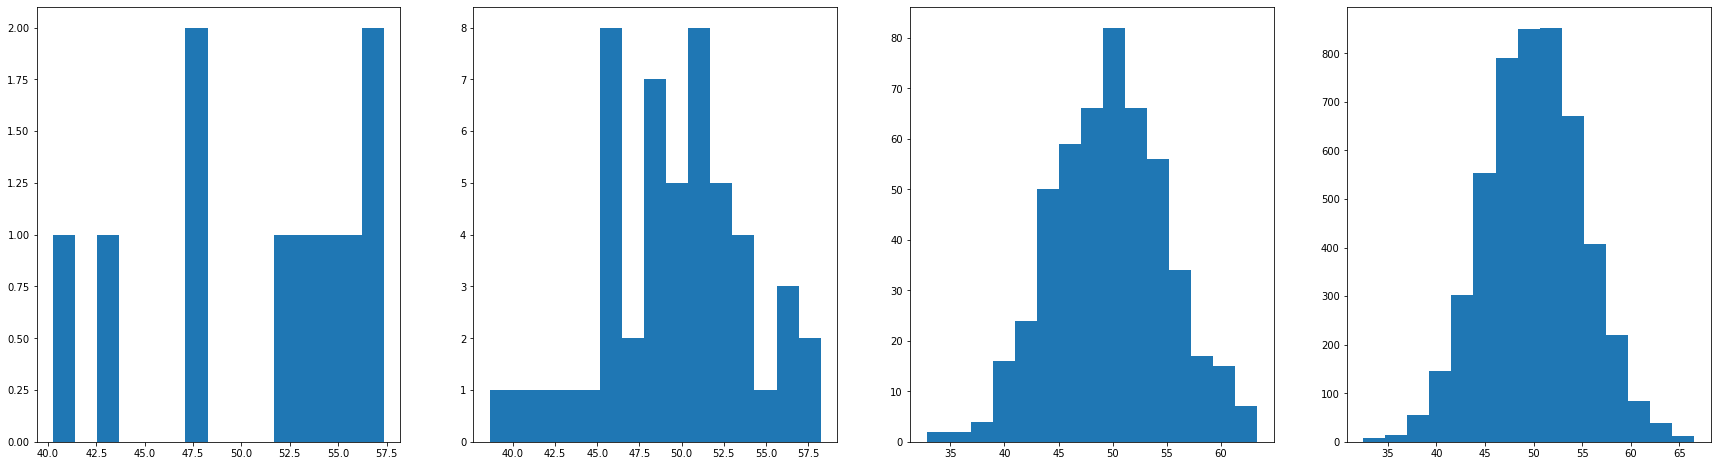

In [32]:
# Create figure and axes
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
fig.set_size_inches(30,8)

# Variables
x = np.linspace(0,10,100)
dist1 = dists[0]
dist2 = dists[1]
dist3 = dists[2]
dist4 = dists[3]

# Plot each histogram

ax1.hist(dist1,bins=15)
ax2.hist(dist2,bins=15)
ax3.hist(dist3,bins=15)
ax4.hist(dist4,bins=15)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

`Comments:`


According to the central limit theorem, as the size of the sample increases it's more likely that the distribution will fit a normal distribution. Here we can see that the smallest sample, doesn't look like a normal distribution (although d'Agostino test tells us that we cannot reject that in fact it is one). As we increase size (figures 2,3 and 4), the resemblance gets better, and in the 4th plot we can see clearly the bell shape.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](images/ch-2.png)

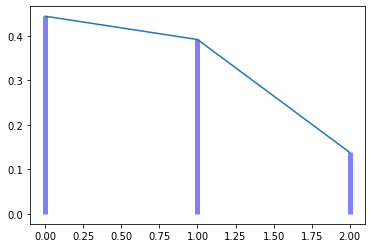

In [59]:
# Variables 
p = 0.15
n = 5

# Binomial distribution
bindist = stats.binom(n,p)

# Plot line + bullet point -> Discrete Distribution Representation
x = np.arange(bindist.ppf(0.01), bindist.ppf(0.99))
fmp = bindist.pmf(x)
plt.plot(x, fmp, '-')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)

#### Explain what you observe from the plot above.

`Comments:`



Here we see the probabilitaty that "x" number of people (from a group of 5) watched the add. Since the probability of watching the ad is pretty low (0.15), the most probable outcome is that 0 people from this group watched it. 

In [58]:
print(f'the probability that 0 out of 5 people watched the ad is {round(bindist.pmf(0) * 100,3)}')

the probability that 0 out of 5 people watched the ad is 44.371


#### Now plot PMP with 50, 500, and 5000 visitors.

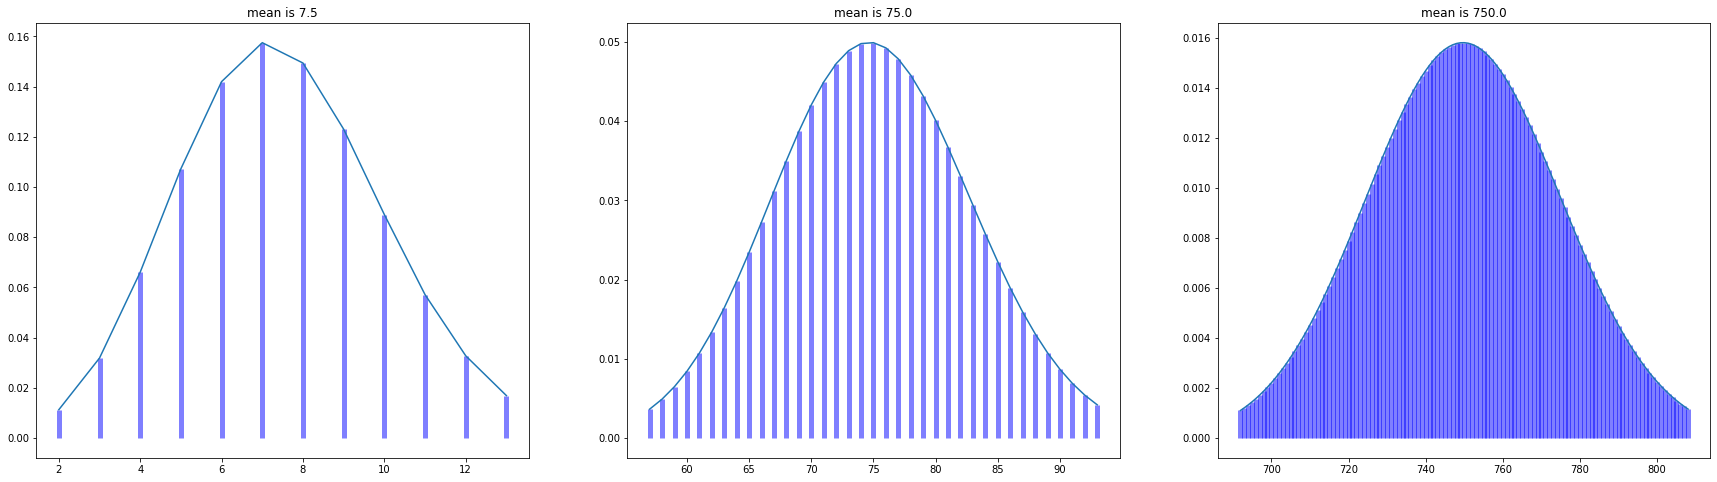

In [77]:
# Create figure and axes
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_size_inches(30,8)

# Variables
p = 0.15
n = [50,500,5000]
subs = [ax1,ax2,ax3]

# Plot each PMF
for i,j in zip(n, subs):
    dist = stats.binom(i,p)
    x = np.arange(dist.ppf(0.01), dist.ppf(0.99))
    fmp = dist.pmf(x)
    j.plot(x, fmp, '-')
    j.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
    j.set_title(f'mean is {dist.mean()}')
      
# For visualization reasons, the next discrete distributions are represented using continuous lines

#### What did you notice from the distribution plots? Comment your findings.

`Comments:`


Even in the smallest sample, normality can be clearly appreciated. If we calculate the mean for each, we can see that it falls in 7.5, 75, and 750 incresing by 1 digit as we increase the size be 1 digit too. 

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

`Comments:`<br/>


Poisson distribution tells us the probability that an event occurs in a certain stablished period.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [87]:
# Variables
mu = 300
visits = 320

# Probability
poisdist = stats.poisson(mu)
print(f'the probability of getting exactly 320 visitors in a day is {round(poisdist.pmf(visits) * 100,3)}')

the probability of getting exactly 320 visitors in a day is 1.161


#### What is the probability of getting 60 visits?

In [89]:
# Variables
visits = 60

# Probability
poisdist = stats.poisson(mu)
print(f'the probability of getting exactly 320 visitors in a day is {poisdist.pmf(visits) * 100}')

the probability of getting exactly 320 visitors in a day is 2.622743762294515e-62


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](images/ch-3.png)

Text(0.5, 1.0, 'mean is 300.0 with probability of 2.303%')

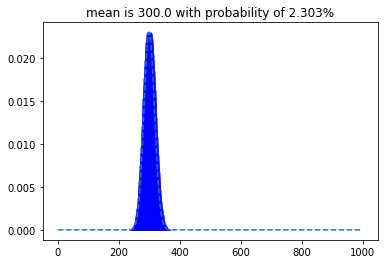

In [98]:
# Variables
visits = range(1000)
poisdist = stats.poisson(300)

# Plot of the distribution
x = visits
fmp = poisdist.pmf(x) 
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title(f'mean is {poisdist.mean()} with probability of {round(poisdist.pmf(300)*100,3)}%')

# Challenge 4 - Central Limit Theorem
#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [9]:
# Variables


# Probability


#### b. What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [10]:
# Variables


# Probability


# Challenge 5 - Normal Variables 

The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40. 

<div align="center">$X → N(200,40)$</div>

#### 1. Find the probability that the monthly sales are more than 300. 

In [11]:
# Variables
mu = 200
sigma = 40

# Probability


#### 2. Find the probability that the monthly sales fall between 160 and 240.

In [12]:
# Probability


#### 3. Find the probability that the monthly sales do not exceed 150.

In [13]:
# Probability


#### 4. Find the probability that the monthly sales exceed 3000. 

In [14]:
# Probability


# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4. Find the following probabilities.
#### 1.The probability that in a particular month there is no violent robbery.

In [15]:
# Variables
mu = 4

# Probability


#### 2. The probability that there are at least 1 in a given month. 

In [16]:
# Probability


#### 3. The probability that there are between 2 and 6 (inclusive) in a given month.

In [17]:
# Probability


#### 4. The probability that there more than two in 15 days.  

In [18]:
# Probability
